In [1]:
# Import libraries

import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et

# You may not need this line to plot inline
os.chdir(os.path.join(et.io.HOME, "earth-analytics"))

# Get week 4 data!
et.data.get_data("spatial-vector-lidar")

'/Users/lewa8222/earth-analytics/data/spatial-vector-lidar/.'

In [37]:
# Import external functions and tools 
import clip_data as cl
help(cl.clip_shp)

Help on function clip_shp in module clip_data:

clip_shp(shp, clip_obj)



## Open a shapefile Using Geopandas


In [2]:
# Open a shapefile using geopandas
plot_centroid_path = "data/spatial-vector-lidar/california/neon-sjer-site/vector_data/SJER_plot_centroids.shp"
sjer_plot_locations = gpd.read_file(plot_centroid_path)

# View data attributes
sjer_plot_locations.head()


,Plot_ID,Point,northing,easting,plot_type,geometry
0,SJER1068,center,4111567.818,255852.376,trees,POINT (255852.376 4111567.818)
1,SJER112,center,4111298.971,257406.967,trees,POINT (257406.967 4111298.971)
2,SJER116,center,4110819.876,256838.760,grass,POINT (256838.76 4110819.876)
3,SJER117,center,4108752.026,256176.947,trees,POINT (256176.947 4108752.026)
4,SJER120,center,4110476.079,255968.372,grass,POINT (255968.372 4110476.079)


In [3]:
type(sjer_plot_locations)

geopandas.geodataframe.GeoDataFrame

In [4]:
sjer_plot_locations.total_bounds

array([  254738.618,  4107527.074,   258497.102,  4112167.778])

In [5]:
sjer_plot_locations.crs

{'init': 'epsg:32611'}

In [6]:
sjer_plot_locations.geom_type

0     Point
1     Point
2     Point
3     Point
4     Point
5     Point
6     Point
7     Point
8     Point
9     Point
10    Point
11    Point
12    Point
13    Point
14    Point
15    Point
16    Point
17    Point
dtype: object

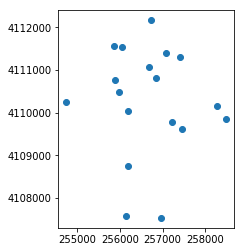

In [7]:
# You can plot directly 
sjer_plot_locations.plot()

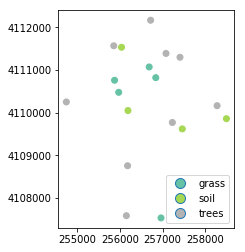

In [16]:
# Plot using Matplotlib
fig, ax1 = plt.subplots()
sjer_plot_locations.plot(ax=ax1,
                         column="plot_type",
                         legend=True,
                         cmap="Set2")
plt.show()

In [10]:
# View object shape
sjer_plot_locations.shape

(18, 6)

## Reproject Vector Data in Python



In [19]:
# Import the data
sjer_roads_path = "data/spatial-vector-lidar/california/madera-county-roads/tl_2013_06039_roads.shp"
sjer_roads = gpd.read_file(sjer_roads_path)

sjer_aoi_path = "data/spatial-vector-lidar/california/neon-sjer-site/vector_data/SJER_crop.shp"
sjer_aoi = gpd.read_file(sjer_aoi_path)

sjer_aoi.crs, sjer_roads.crs

({'init': 'epsg:32611'}, {'init': 'epsg:4269'})

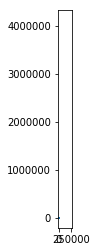

In [23]:
# plot with the data in diff CRS
fig, ax = plt.subplots()
sjer_aoi.plot(ax=ax)
sjer_roads.plot(ax=ax)
plt.show()

In [ ]:
# Reproject the data by typing out the CRS 
sjer_aoi_wgs84 = sjer_aoi.to_crs({'init':'epsg:4269'})

In [28]:
# Easier way if you have a layer that you want to match the CRS of 
sjer_aoi_4269 = sjer_aoi.to_crs(sjer_roads.crs)

sjer_aoi_4269.crs, sjer_roads.crs

({'init': 'epsg:4269'}, {'init': 'epsg:4269'})

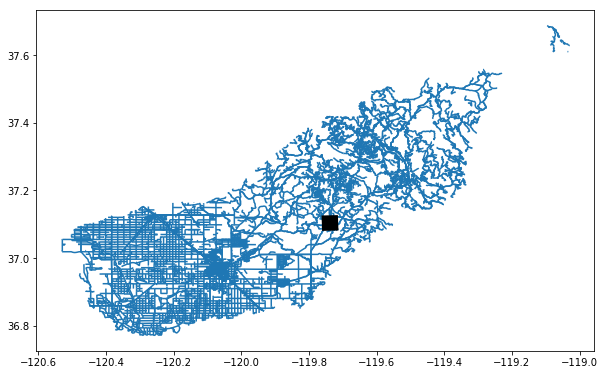

In [34]:
# plot with the data in diff CRS
fig, ax = plt.subplots(figsize=(10, 10))
# zorder to adjust the order 
sjer_roads.plot(ax=ax)
sjer_aoi_4269.plot(ax=ax,
                   color="black",
                   zorder=10)
plt.show()

## Clip Data

In [41]:
# Import data
country_boundary_us_path = "data/spatial-vector-lidar/usa/usa-boundary-dissolved.shp"
country_boundary_us = gpd.read_file(country_boundary_us_path)

state_boundary_us_path = "data/spatial-vector-lidar/usa/usa-states-census-2014.shp"
state_boundary_us = gpd.read_file(state_boundary_us_path)

pop_places_path = "data/spatial-vector-lidar/global/ne_110m_populated_places_simple/ne_110m_populated_places_simple.shp"
pop_places = gpd.read_file(pop_places_path)

# Do the data have the same crs?
country_boundary_us.crs, state_boundary_us.crs, pop_places.crs 

({'init': 'epsg:4326'}, {'init': 'epsg:4326'}, {'init': 'epsg:4326'})

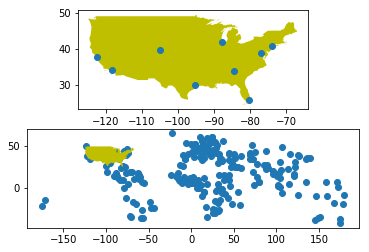

In [52]:
pop_places_clip = cl.clip_shp(pop_places, country_boundary_us)

# Plot the data in 2 frames or axes
fig, (ax1, ax2) = plt.subplots(2, 1)
country_boundary_us.plot(ax=ax1,
                         color="y")
pop_places_clip.plot(ax=ax1)
pop_places.plot(ax=ax2)
country_boundary_us.plot(ax=ax2,
                         color="y")
plt.show()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"(POLYGON Z ((-118.593969 33.467198 0, -118.484..."
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.119759 38.934343 0, -77.041017..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"(POLYGON Z ((-81.81169299999999 24.568745 0, -..."
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.605165 34.984678 0, -85.474338..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.243027 44.390974 0, -117.2150..."


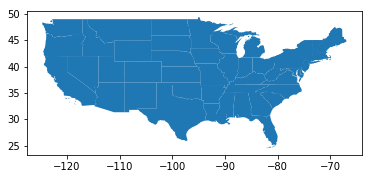

In [54]:
state_boundary_us.plot()
# View dataframe
state_boundary_us.head()

## Dissolve States to Regions! 


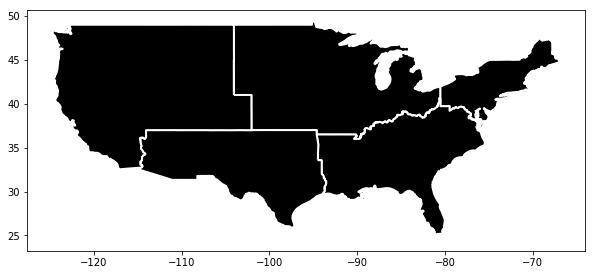

In [61]:
us_regions = state_boundary_us.dissolve(by="region")
us_regions.plot(color="black",
                figsize=(10, 10),
                linewidth=2,
                edgecolor="white")

In [62]:
us_regions.head()

,geometry,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER
region,,,,,,,,,,
Midwest,"(POLYGON Z ((-82.863342 41.693693 0, -82.82571...",17,01779784,0400000US17,17,IL,Illinois,00,143794747023,6200927458
Northeast,"(POLYGON Z ((-76.04621299999999 38.025533 0, -...",11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500
Southeast,"(POLYGON Z ((-81.81169299999999 24.568745 0, -...",12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551
Southwest,"POLYGON Z ((-94.48587499999999 33.637867 0, -9...",48,01779801,0400000US48,48,TX,Texas,00,676601887070,19059877230
West,"(POLYGON Z ((-118.594033 33.035951 0, -118.540...",06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881


In [65]:
## aggregate the data
us_regions = state_boundary_us.dissolve(by="region",
                                       aggfunc=["mean", "sum"])
us_regions.head()

/Users/lewa8222/anaconda3/envs/earth-analytics-python/lib/python3.6/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,geometry,"(ALAND, mean)","(ALAND, sum)","(AWATER, mean)","(AWATER, sum)"
region,,,,,
Midwest,"(POLYGON Z ((-82.863342 41.693693 0, -82.82571...",1.619891e+11,1943869253244,1.536528e+10,184383393833
Northeast,"(POLYGON Z ((-76.04621299999999 38.025533 0, -...",4.138410e+10,869066138232,5.186783e+09,108922434345
Southeast,"(POLYGON Z ((-81.81169299999999 24.568745 0, -...",1.137193e+11,1364632039655,8.656388e+09,103876652998
Southwest,"POLYGON Z ((-94.48587499999999 33.637867 0, -9...",3.656579e+11,1462631530997,6.054421e+09,24217682268
West,"(POLYGON Z ((-118.594033 33.035951 0, -118.540...",2.702596e+11,2432336444730,6.396450e+09,57568049509


In [68]:
a = (2,3)
type(a)
a = [2,3]
type(a)

list

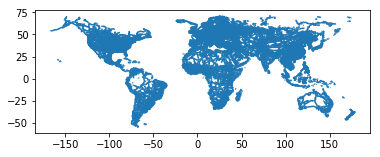

In [70]:
roads_path = "data/spatial-vector-lidar/global/ne_10m_roads/ne_10m_roads.shp"
roads = gpd.read_file(roads_path)
roads.plot()

In [72]:
# Clip the roads layer
country_boundary_us_sim = country_boundary_us.simplify(.2, preserve_topology=True)
roads_cl = cl.clip_shp(roads, country_boundary_us_sim)


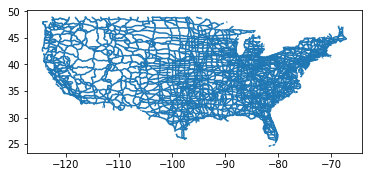

In [73]:
roads_cl.plot()

## use sjoin to join attributes to roads

In [74]:
roads_region = gpd.sjoin(roads_cl,
                        us_regions,
                        how="inner",
                        op="intersects")

In [75]:
roads_region.head()


,scalerank,featurecla,type,sov_a3,note,edited,name,namealt,namealtt,routeraw,...,expressway,level,min_zoom,min_label,geometry,index_right,"(ALAND, mean)","(ALAND, sum)","(AWATER, mean)","(AWATER, sum)"
1453,3,Road,Major Highway,USA,None,New in version 2.0.0,5,None,None,None,...,1,Interstate,3.0,6.0,LINESTRING Z (-122.86581912333 42.324756038429...,West,2.702596e+11,2432336444730,6.396450e+09,57568049509
1434,4,Road,Secondary Highway,USA,None,New in version 2.0.0,199,None,None,None,...,0,Federal,4.0,7.0,LINESTRING Z (-123.3086507184169 42.4393712748...,West,2.702596e+11,2432336444730,6.396450e+09,57568049509
1492,6,Road,Secondary Highway,USA,None,New in version 2.0.0,395,None,None,None,...,0,Federal,6.0,7.9,LINESTRING Z (-120.3408107340895 42.1875650736...,West,2.702596e+11,2432336444730,6.396450e+09,57568049509
50512,7,Road,Secondary Highway,USA,None,New in version 2.0.0,191,None,None,None,...,0,Federal,7.0,8.0,LINESTRING Z (-109.2303288616861 41.6085043216...,West,2.702596e+11,2432336444730,6.396450e+09,57568049509
49677,7,Road,Secondary Highway,USA,None,New in version 2.0.0,91,None,None,None,...,0,Federal,7.0,8.0,LINESTRING Z (-111.8122840324895 41.9987129491...,West,2.702596e+11,2432336444730,6.396450e+09,57568049509


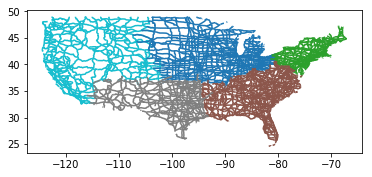

In [76]:
roads_region.plot(column="index_right")